<a href="https://colab.research.google.com/github/joeplustenhouwer/academic-kickstart/blob/master/workshop_week_7_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:


import matplotlib.pyplot as plt
import numpy as np


In [19]:
sigma= 2
kappa=0.3
beta=0.99
rho=-np.log(beta)
phi_2=0.0
std_rn=0.01
std_u=0.01
rho_u=0.9
a_x=0.25
phi_1=(1-rho_u)*kappa*sigma/a_x+rho_u
print(phi_1)
psi=1/(kappa**2+a_x*(1-beta*rho_u))
psi_i=psi*(kappa*sigma*(1-rho_u)+a_x*rho_u)

1.14


In [20]:
N=1000 #simualte N periods

Y=np.zeros(N)
Pi=np.zeros(N)
ni=np.zeros(N)#nominal interest rate
ni_opt=np.zeros(N)#optimal nominal interest rate
re=np.zeros(N)
u=np.zeros(N)
EY=np.zeros(N)
EPi=np.zeros(N)


In [21]:
for t in range(1,N):



    re[t]=rho+std_rn*np.random.randn()
    u[t]=rho_u*u[t-1]+std_u*np.random.randn()
    EY[t]=-kappa*psi*rho_u*u[t]
    EPi[t]=a_x*psi*rho_u*u[t]


#write model equations in form M z_t= N Ez_t+1 + c + d* re[t]+ e *u[t]
#where M and N are martices and c and d are vectors
    M=np.array([[1,0,1/sigma],
                [-kappa,1,0],
                [-phi_2,-phi_1,1]])

    N=np.array([[1,1/sigma,0],
            [0,beta,0],
            [0,0,0]])

    c=np.array([0,0,0])

    d=np.array([1/sigma,0,1])

    e=np.array([0,1,0])



    RHS= np.dot(N,np.array([EY[t],EPi[t],0])) + c + d* re[t]+ e *u[t]
    z=np.dot(np.linalg.inv(M),RHS)
    Y[t]=z[0]
    Pi[t]=z[1]
    ni[t]=z[2]
    ni_opt[t]=re[t]+psi_i*u[t]

In [22]:
print(ni-ni_opt)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.46944695e-18  6.93889390e-18  1.38777878e-17
  1.38777878e-17  2.77555756e-17  0.00000000e+00 -1.38777878e-17
 -6.93889390e-18  0.00000000e+00  3.46944695e-18  5.20417043e-18
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  6.93889390e-18  0.00000000e+00  3.46944695e-18  0.00000000e+00
  6.93889390e-18  1.73472348e-18  9.75781955e-19  0.00000000e+00
 -6.93889390e-18 -3.46944695e-18  1.73472348e-18  6.93889390e-18
 -6.93889390e-18 -1.73472348e-18 -8.67361738e-19 -1.73472348e-18
  0.00000000e+00  3.46944695e-18  3.46944695e-18  3.46944695e-18
  6.93889390e-18  1.04083409e-17  0.00000000e+00  0.00000000e+00
 -1.38777878e-17  1.38777878e-17 -6.93889390e-18  0.00000000e+00
  3.46944695e-18  3.46944695e-18  0.00000000e+00  0.00000000e+00
 -6.93889390e-18  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.38777878e-17  0.00000000e+00  0.00000000e+00
 -6.93889390e-18 -6.93889

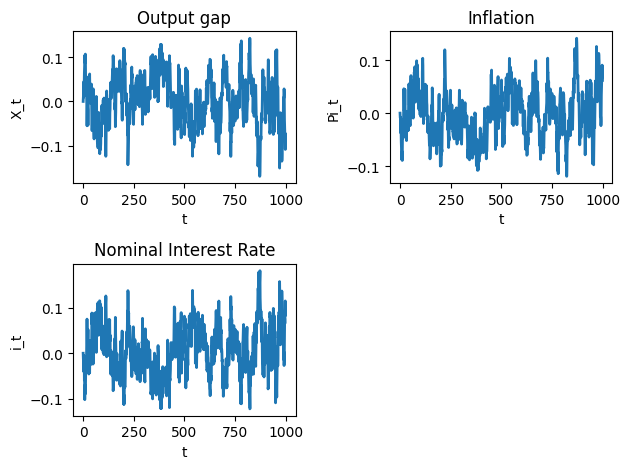

In [23]:
plt.figure()
plt.subplot(2, 2, 1)
plt.plot(Y,linewidth=2)
plt.title('Output gap')
plt.ylabel('X_t')
plt.xlabel('t')



plt.subplot(2, 2, 2)
plt.plot(Pi,linewidth=2)
plt.title('Inflation')
plt.ylabel('Pi_t')
plt.xlabel('t')



plt.subplot(2, 2, 3)
plt.plot(ni,linewidth=2)
plt.title('Nominal Interest Rate')
plt.ylabel('i_t')
plt.xlabel('t')
plt.tight_layout() #





In [24]:
L=a_x*np.var(Y)+np.var(Pi)
print('Loss is:',L)

Loss is: 0.00292078113212394
